In [1]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
#importing the libraries

import os
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.style

import string

import plotly.express as px

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
#from sklearn.feature_extraction.text import TfidVectorizer, CountVectorizer
 
from scipy.stats import zscore

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.compose import TransformedTargetRegressor

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import FunctionTransformer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline


import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('data dictionary.xlsx')
data

,Attribute,Description
0,Name,The brand and model of the car
1,Location,The location in which the car is being sold or...
2,Year,The year or edition of the model
3,Kilometers_Driven,The total kilometers driven in the car by the ...
4,Fuel_Type,The type of fuel used by the car
5,Transmission,The type of transmission used by the car
6,Owner_Type,"Whether the ownership is Firsthand, Second han..."
7,Mileage,The standard mileage offered by the car compan...
8,Engine,The displacement volume of the engine in cc
9,Power,The maximum power of the engine in bhp


In [3]:
train_data = pd.read_csv('train.csv',index_col = False)
test_data = pd.read_csv('test.csv',index_col = False)

In [4]:
train_data = train_data.iloc[:,1:]
test_data = test_data.iloc[:,1:]

In [5]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [6]:
print(train_data.shape)
print(test_data.shape)

(6019, 13)
(1234, 12)


In [7]:
org_data = train_data.copy()

In [8]:
org_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   object 
 8   Engine             1224 non-null   object 
 9   Power              1224 non-null   object 
 10  Seats              1223 non-null   float64
 11  New_Price          182 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 115.8+ KB


In [11]:
train_data.duplicated().sum()

0

In [12]:
unique_counts = []

for col in train_data.columns:
    unique_counts.append((col,train_data[col].nunique()))
unique_counts = sorted(unique_counts,key = lambda x:x[1],reverse = True)

print("No of unique values in each columns are as follows :(In Descending order)\n")

for col,nunique in unique_counts:
    print(f'{col} :{nunique} :{round(nunique/6019*100,2)}%')
    
    
    


No of unique values in each columns are as follows :(In Descending order)

Kilometers_Driven :3093 :51.39%
Name :1876 :31.17%
Price :1373 :22.81%
New_Price :540 :8.97%
Mileage :442 :7.34%
Power :372 :6.18%
Engine :146 :2.43%
Year :22 :0.37%
Location :11 :0.18%
Seats :9 :0.15%
Fuel_Type :5 :0.08%
Owner_Type :4 :0.07%
Transmission :2 :0.03%


In [13]:
#Missing data Visualization

def missing_data(df):
    sns.heatmap(df.isnull() , yticklabels=False, cbar = False)
    total = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum() / df.isnull().count())*100).sort_values(ascending = False)
    
    missing_val = pd.concat([total,percent],axis = 1,keys= ['Total','Percent'])
    missing_val = missing_val[missing_val['Percent']>0]
    
    plt.figure(figsize=(5,5))
    sns.barplot(x=missing_val['Percent'], y = missing_val.index)
    
    plt.xlabel('Feature',fontsize=15)
    plt.ylabel('percentage',fontsize=15)
    plt.title('Missing data %',fontsize= 20)
    
    
    


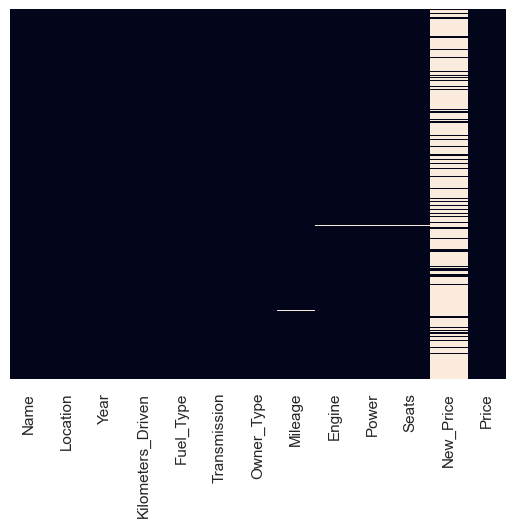

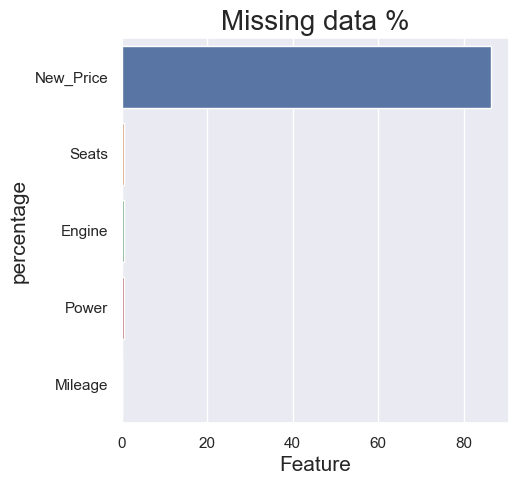

In [14]:
missing_data(train_data)

In [15]:
for col in train_data.columns:
    if train_data[col].isnull().sum() != 0 :
        print(f'{col}: {train_data[col].isnull().sum()} : {round(train_data[col].isnull().mean()*100,2)}%')

Mileage: 2 : 0.03%
Engine: 36 : 0.6%
Power: 36 : 0.6%
Seats: 42 : 0.7%
New_Price: 5195 : 86.31%


In [16]:
train_data.describe(include='all')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,6019,6019,6019.000000,6.019000e+03,6019,6019,6019,6017,5983,5983,5977.000000,824,6019.000000
unique,1876,11,NaN,NaN,5,2,4,442,146,372,NaN,540,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,NaN,95.13 Lakh,NaN
freq,49,790,NaN,NaN,3205,4299,4929,172,606,235,NaN,6,NaN
mean,NaN,NaN,2013.358199,5.873838e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.278735,NaN,9.479468
std,NaN,NaN,3.269742,9.126884e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.808840,NaN,11.187917
min,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.440000
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,3.500000
50%,NaN,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,5.640000
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,9.950000


In [17]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [18]:
def analyze_col_data(data):
    analyze = data.str.findall('[a-zA-z]+',)
    analyze = [x[0] for x in analyze if x is not np.nan]
    return set(analyze)
    
def brand(b):
    return b.split()[0]

def model(m):
    return m.split()[1]

In [19]:
train_data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [20]:
train_data['Name'][1]

'Hyundai Creta 1.6 CRDi SX Option'

In [21]:
train_data['Brand'] = train_data['Name'].apply(brand)
train_data['Model'] = train_data['Name'].apply(model)


In [22]:
analyze_col_data(train_data['New_Price'])

{'Cr', 'Lakh'}

In [23]:
analyze_col_data(train_data['Mileage'])


{'km', 'kmpl'}

In [24]:
analyze_col_data(train_data['Engine'])

{'CC'}

In [25]:
analyze_col_data(train_data['Power'])

{'bhp', 'null'}

In [26]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,A4


In [27]:
def convert_new_price(p):
    if type(p) == str:
        p = p.lower()
        if 'lakh' in p:
            p =  p.strip('lakh')
            p = float(p)
        elif 'cr' in p:
            p = p.strip('cr')
            p = float(p) * 100
        return p

In [28]:
train_data['New_Price_converted'] = train_data['New_Price'].apply(convert_new_price)


In [29]:
train_data.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,New_Price_converted
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,Wagon,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,Creta,NaN
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,Jazz,8.61
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,Ertiga,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,A4,NaN


In [30]:
def adjust_mileage(s):
    if type(s) == str:
        s = s.lower()
        if 'kmpl' in s:
            s = s.strip('kmpl')
        if 'km/kg' in s:
            s = s.strip('km/kg')
            s = float(s)*1.8
    return s

In [31]:
train_data.describe(include='all')
train_data['Year_converted'] = train_data['Year'].astype('str')
train_data['Engine_converted'] = train_data['Engine'].str.strip('CC').astype('float')

train_data['Mileage_converted'] = train_data['Mileage'].apply(adjust_mileage)
train_data['Mileage_converted'] = train_data['Mileage_converted'].astype('float')


train_data['Power'] = train_data['Power'].str.strip('bhp')
train_data['Power'] = pd.to_numeric(train_data['Power'],errors='coerce')

In [32]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,New_Price_converted,Year_converted,Engine_converted,Mileage_converted
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16,5.0,NaN,1.75,Maruti,Wagon,NaN,2010,998.0,47.88
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.20,5.0,NaN,12.50,Hyundai,Creta,NaN,2015,1582.0,19.67
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.70,5.0,8.61 Lakh,4.50,Honda,Jazz,8.61,2011,1199.0,18.20
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76,7.0,NaN,6.00,Maruti,Ertiga,NaN,2012,1248.0,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.80,5.0,NaN,17.74,Audi,A4,NaN,2013,1968.0,15.20


In [33]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 6019 non-null   object 
 1   Location             6019 non-null   object 
 2   Year                 6019 non-null   int64  
 3   Kilometers_Driven    6019 non-null   int64  
 4   Fuel_Type            6019 non-null   object 
 5   Transmission         6019 non-null   object 
 6   Owner_Type           6019 non-null   object 
 7   Mileage              6017 non-null   object 
 8   Engine               5983 non-null   object 
 9   Power                5876 non-null   float64
 10  Seats                5977 non-null   float64
 11  New_Price            824 non-null    object 
 12  Price                6019 non-null   float64
 13  Brand                6019 non-null   object 
 14  Model                6019 non-null   object 
 15  New_Price_converted  824 non-null    f

In [34]:
train_data['Seats'] = train_data['Seats'].astype('category')

In [35]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Name                 6019 non-null   object  
 1   Location             6019 non-null   object  
 2   Year                 6019 non-null   int64   
 3   Kilometers_Driven    6019 non-null   int64   
 4   Fuel_Type            6019 non-null   object  
 5   Transmission         6019 non-null   object  
 6   Owner_Type           6019 non-null   object  
 7   Mileage              6017 non-null   object  
 8   Engine               5983 non-null   object  
 9   Power                5876 non-null   float64 
 10  Seats                5977 non-null   category
 11  New_Price            824 non-null    object  
 12  Price                6019 non-null   float64 
 13  Brand                6019 non-null   object  
 14  Model                6019 non-null   object  
 15  New_Price_converted  

# Univariate Analysis


In [36]:
numeric = ['Kilometers_Driven','Price','New_Price_converted','Engine_converted','Mileage_converted','Power','Year']
category =  ['Location','Fuel_Type','Transmission','Owner_Type','Seats','Brand','Model','Year_converted']

In [56]:
for column in category:
    print(f"Unique values for {column}:")
    print(train_data[column].unique())
    print("\n")

Unique values for Location:
['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']


Unique values for Fuel_Type:
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']


Unique values for Transmission:
['Manual' 'Automatic']


Unique values for Owner_Type:
['First' 'Second' 'Fourth & Above' 'Third']


Unique values for Seats:
[5.0, 7.0, 8.0, 4.0, 6.0, 2.0, NaN, 10.0, 9.0, 0.0]
Categories (9, float64): [0.0, 2.0, 4.0, 5.0, ..., 7.0, 8.0, 9.0, 10.0]


Unique values for Brand:
['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini']


Unique values for Model:
['Wagon' 'Creta' 'Jazz' 'Ertiga' 'A4' 'EON' 'Micra' 'Innova' 'Vento'
 'Indica' 'Ciaz' 'City' 'Swift' 'Rover' 'Pajero' 'Amaze' 'Duster' 'New'
 '3' 'S' 'A6

In [53]:
# fig = px.bar(title = 'Car Brand and Model',x=train_data['Brand'].str.strip(), color=train_data['Model'].str.strip(),barmode = 'overlay', opacity=0.5, width=1000, height=500)
# fig.show()

In [67]:

fig = px.scatter(title = 'Car Brand and Fuel Type', x=train_data['Year_converted'].str.strip(), color=train_data['Fuel_Type'].str.strip(),
                  marginal_y="box")
fig.show()

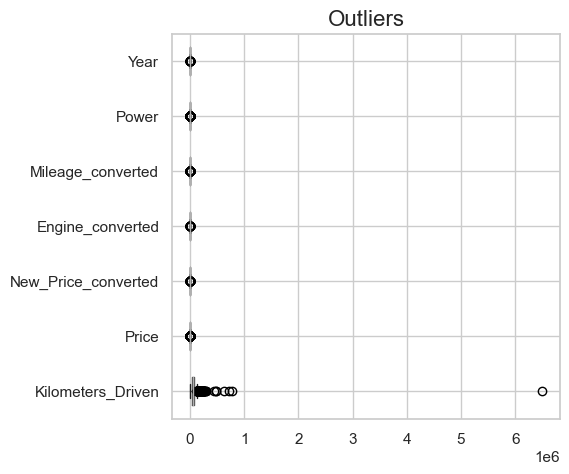

In [54]:

plt.figure(figsize=(5,5))
train_data[numeric].boxplot(vert=0)
plt.title("Outliers", fontsize=16)
plt.show()

In [39]:
train_data[numeric].max().sort_values()

Mileage_converted           60.372
Price                      160.000
New_Price_converted        230.000
Power                      560.000
Year                      2019.000
Engine_converted          5998.000
Kilometers_Driven      6500000.000
dtype: float64

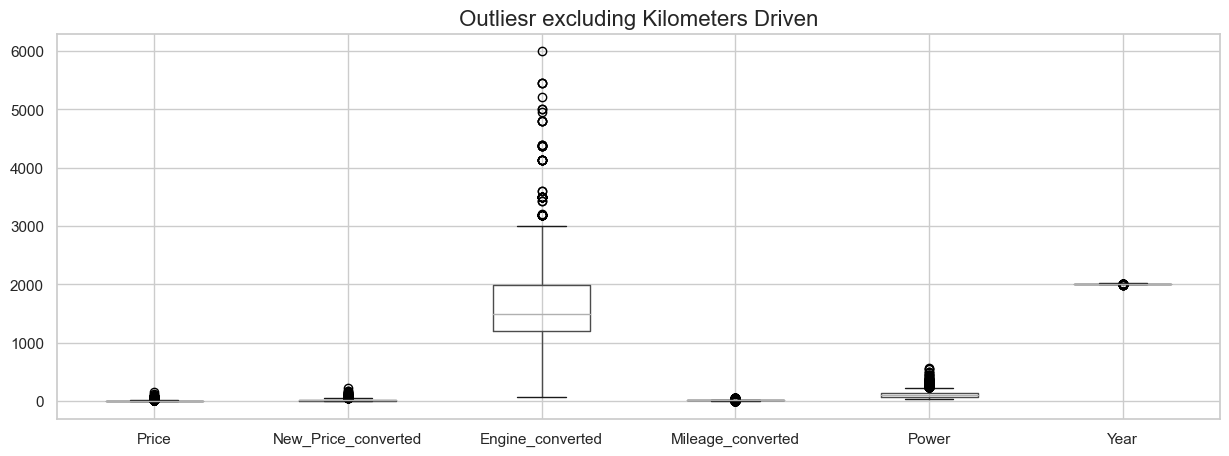

In [55]:
plt.figure(figsize=(15,5))
train_data[numeric].drop(['Kilometers_Driven'],axis=1).boxplot()
plt.title("Outliesr excluding Kilometers Driven", fontsize=16)
plt.show()

In [41]:
def outlier_check(data, n):
    
    for col in data.columns:
        if data[col].dtype == 'int64' or data[col].dtype=='float64' :
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_range = Q1 - (n * IQR) 
            upper_range = Q3 + (n * IQR)   
                
            print(f"Number of outliers in {col} :", data[(data[col] > upper_range) | (data[col] < lower_range)].shape[0])       

In [42]:
outlier_check(train_data, 1.5)

Number of outliers in Year : 50
Number of outliers in Kilometers_Driven : 202
Number of outliers in Power : 238
Number of outliers in Price : 718
Number of outliers in New_Price_converted : 86
Number of outliers in Engine_converted : 61
Number of outliers in Mileage_converted : 125


In [43]:
train_data.shape

(6019, 19)

# Bivariate Analysis

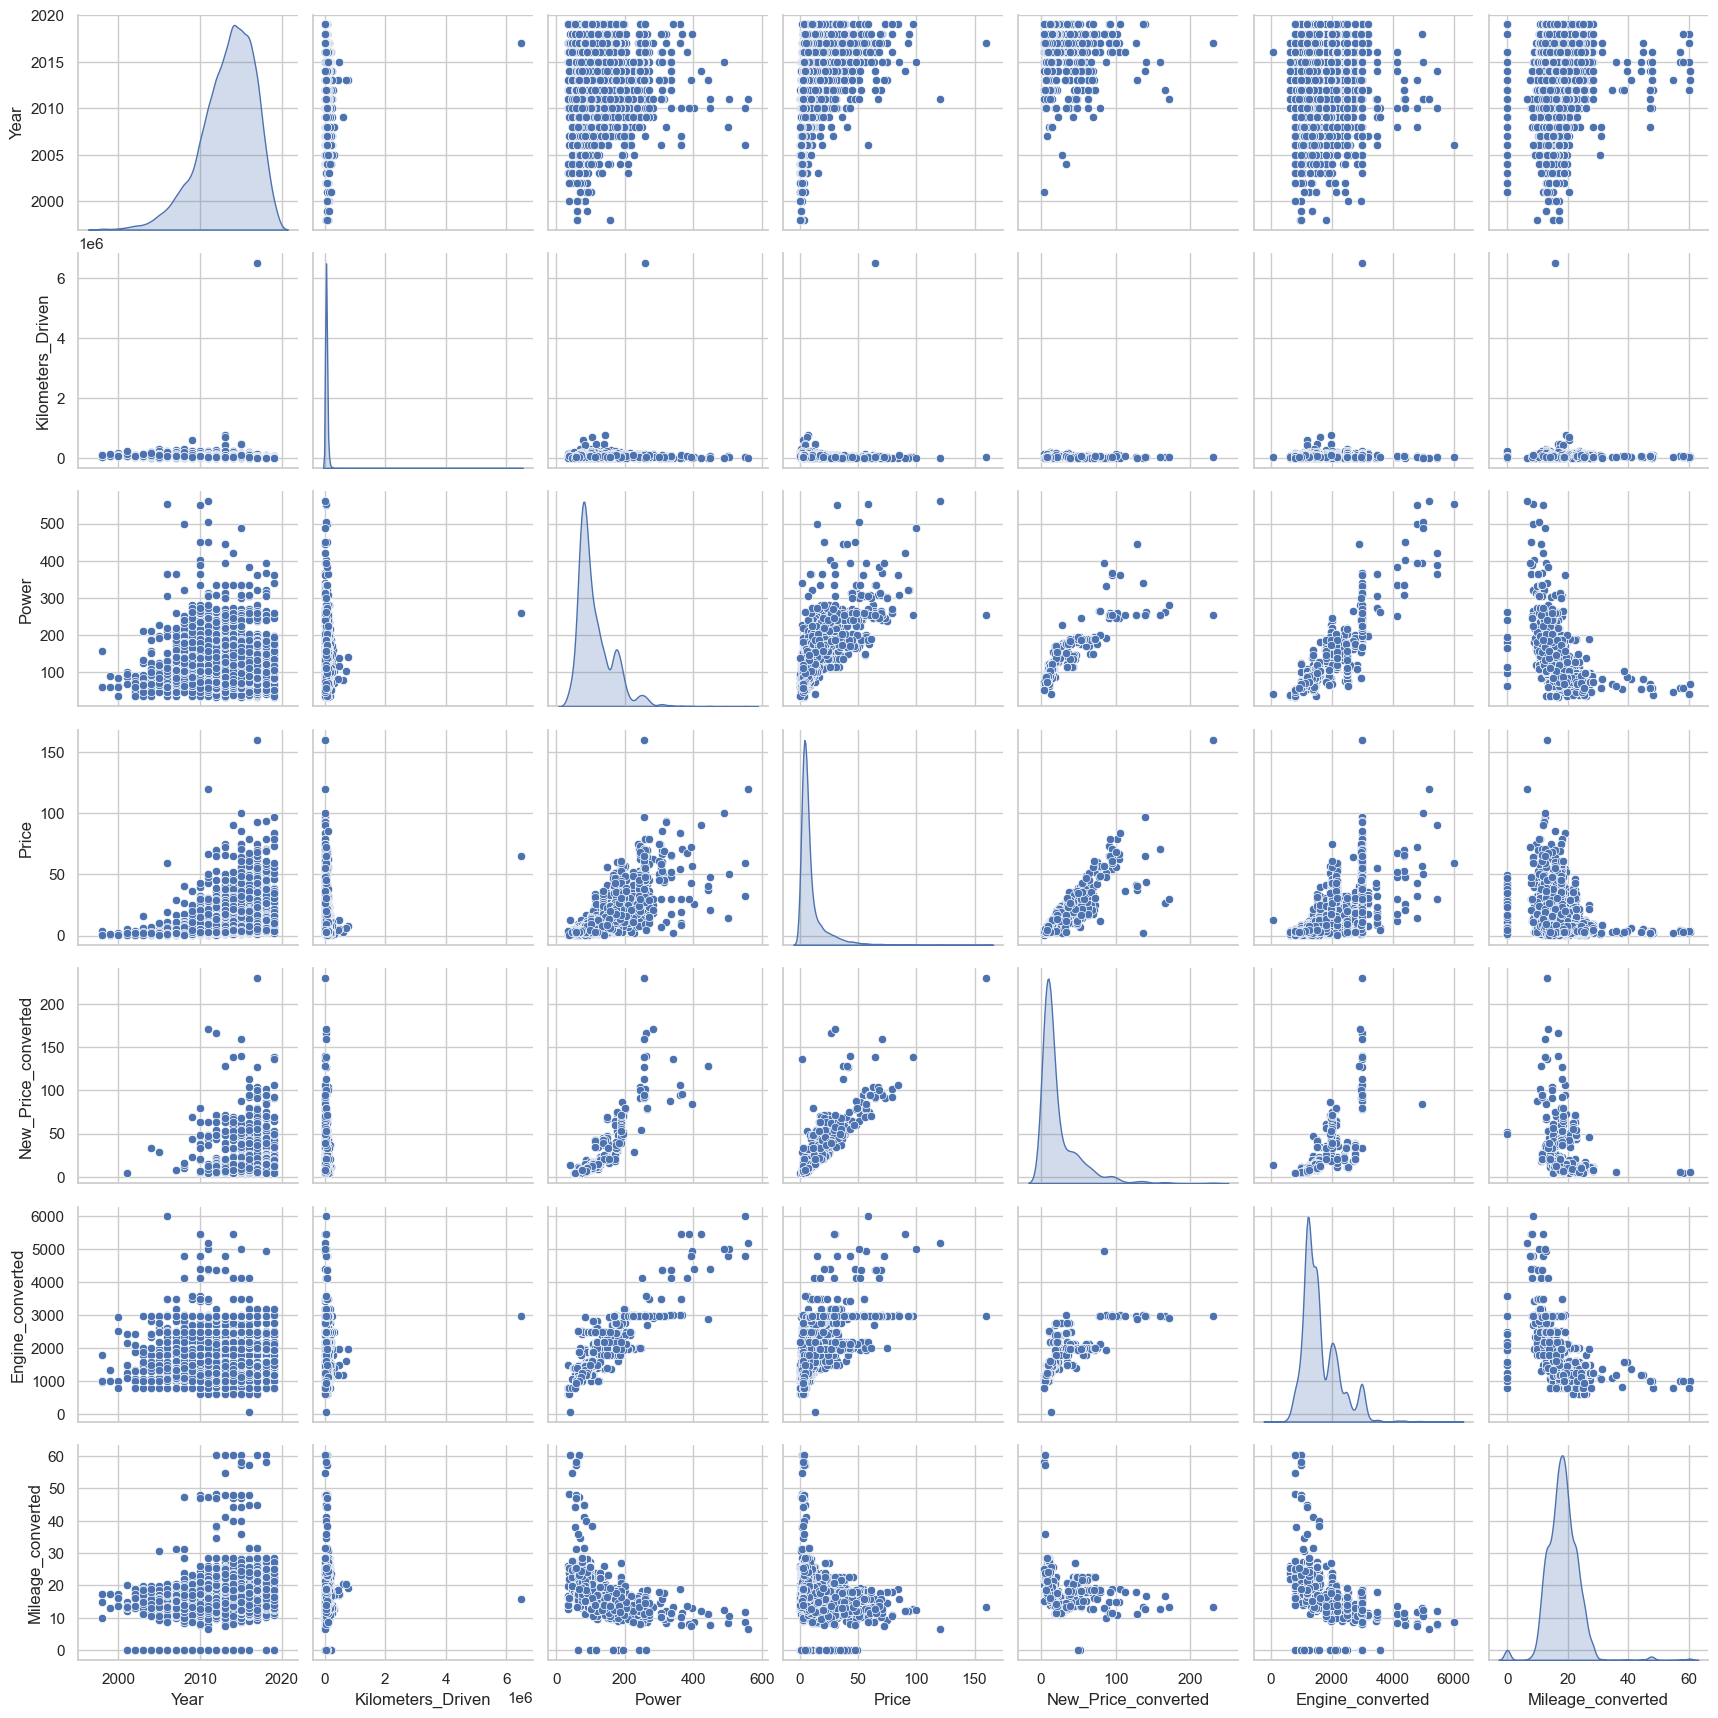

In [44]:


sns.set_style('whitegrid')
sns.pairplot(data=train_data, diag_kind='kde')
plt.show()

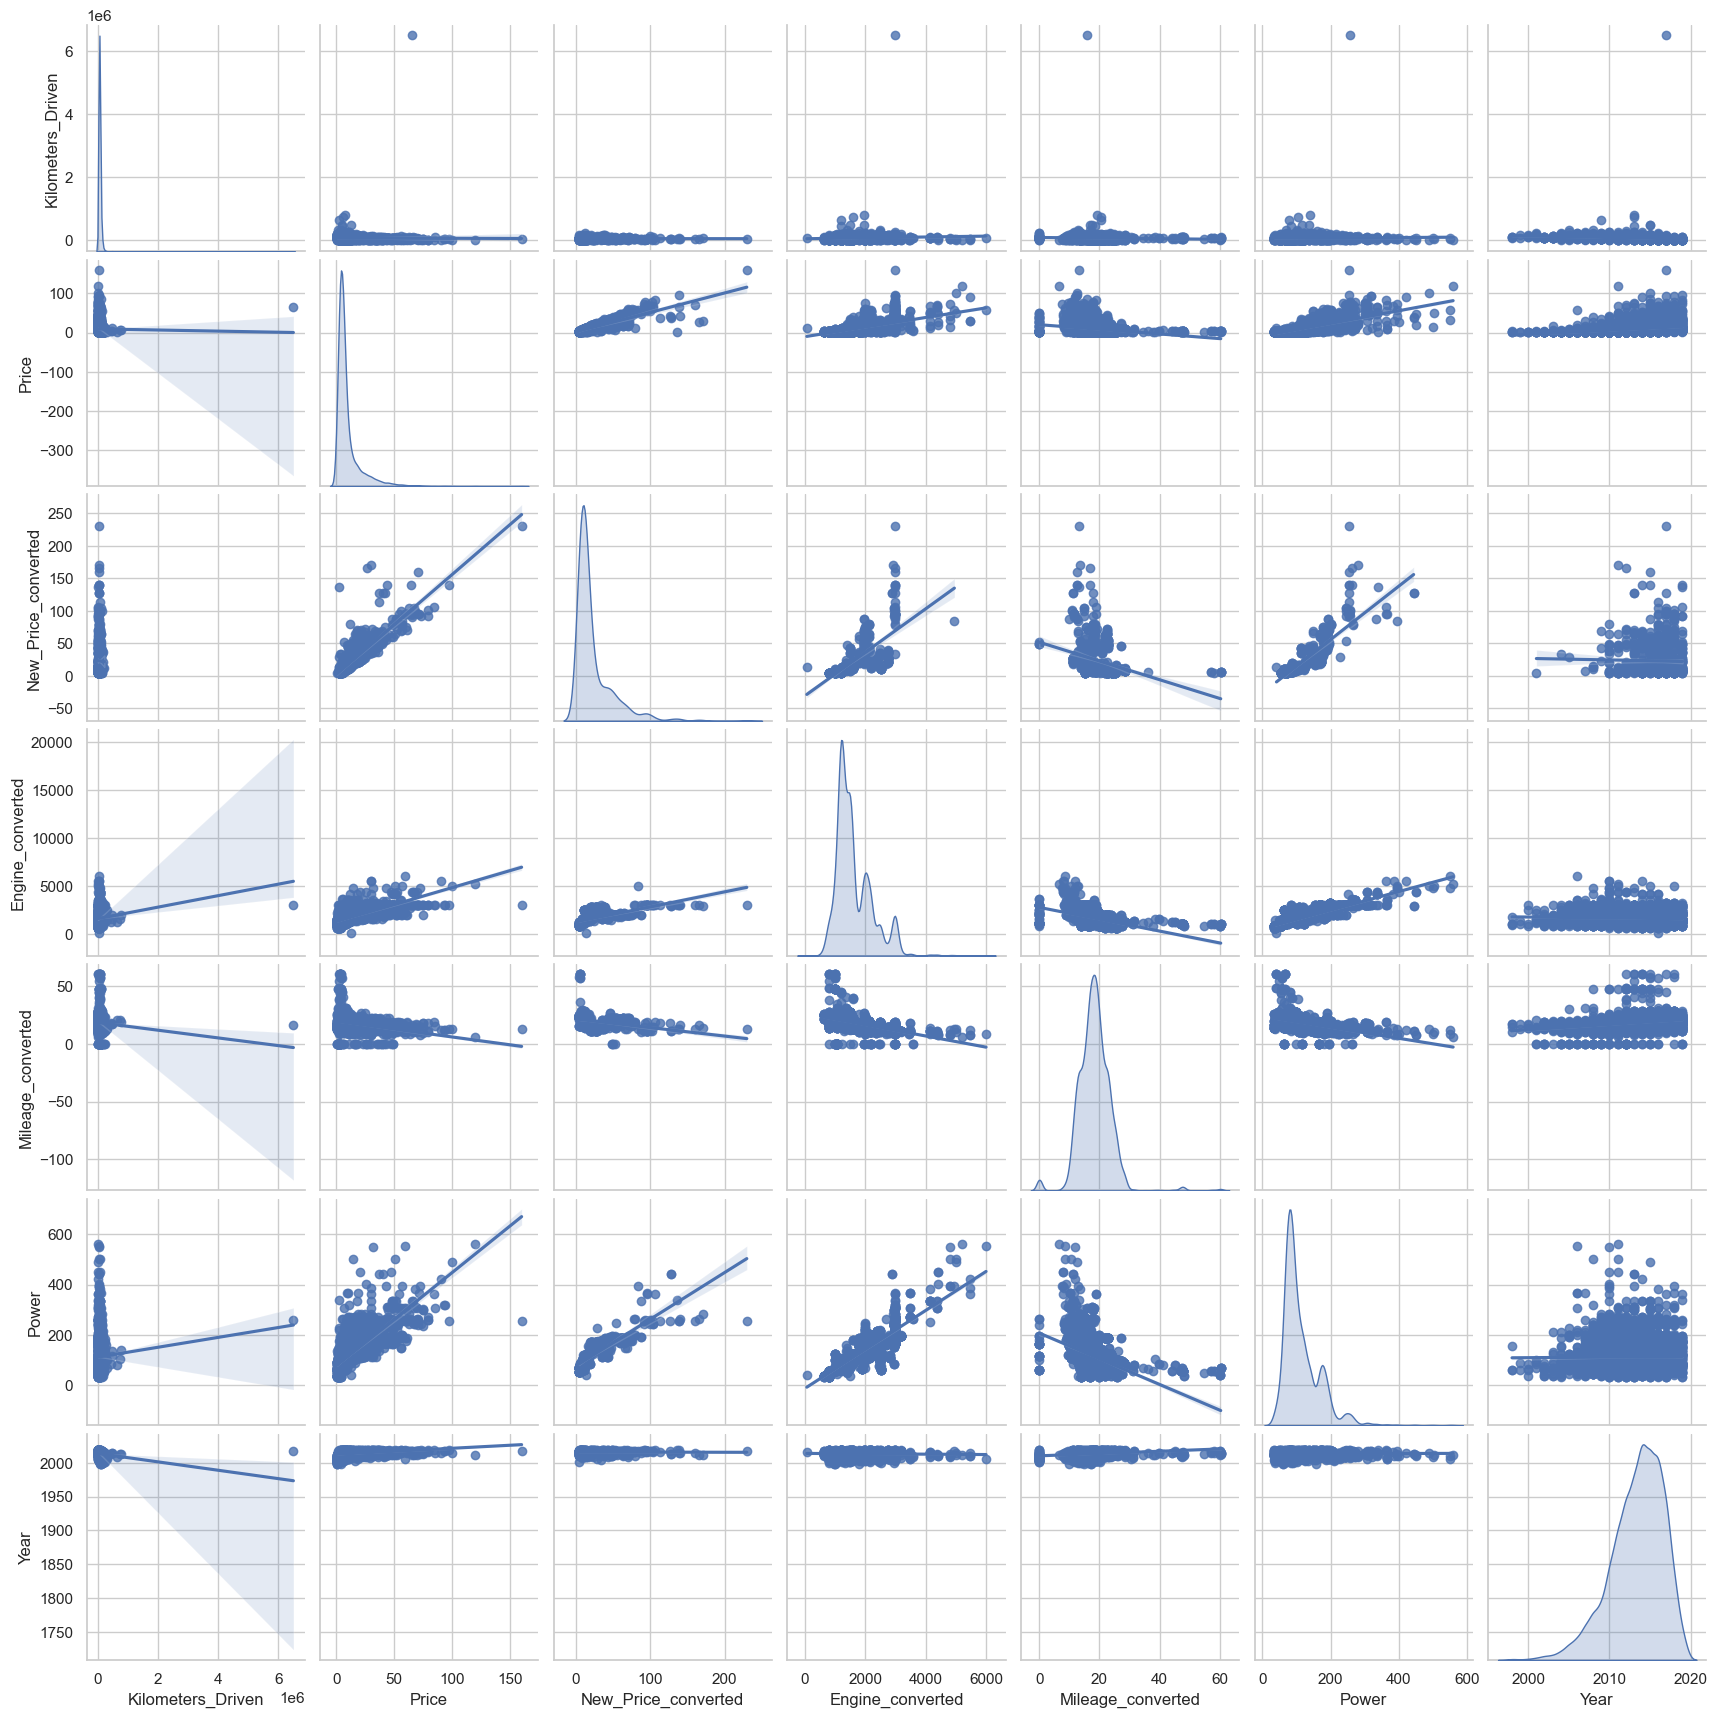

In [45]:
sns.pairplot(data=train_data[numeric],kind='reg', diag_kind='kde')

<Axes: >

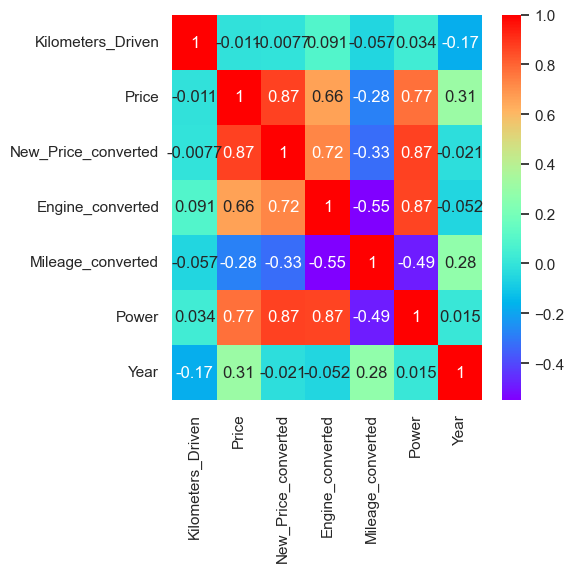

In [46]:
plt.figure(figsize=(5,5))
sns.heatmap(train_data[numeric].corr(), annot = True, cmap='rainbow')

In [47]:
numeric = ['Kilometers_Driven','Price','New_Price_converted','Engine_converted','Mileage_converted','Power','Year']
category =  ['Location','Fuel_Type','Transmission','Owner_Type','Seats','Brand','Model','Year_converted']

<Axes: xlabel='Fuel_Type', ylabel='Price'>

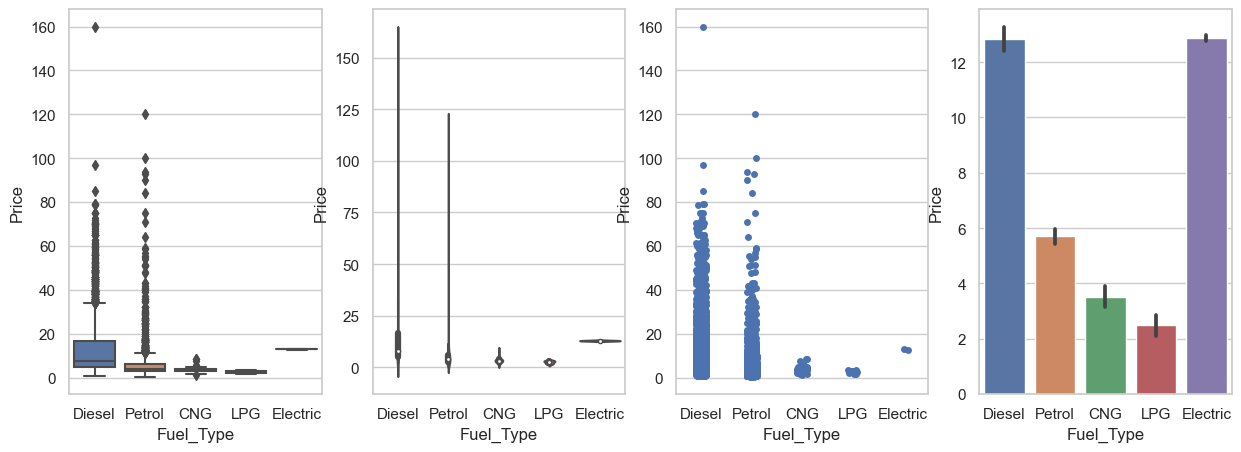

In [48]:
#Categorical value VS Numerical value relations

x = 'Fuel_Type'
y = 'Price'
order = train_data[x].value_counts().index
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
sns.boxplot(x = train_data[x], y=train_data[y], data=train_data, order=order)
plt.subplot(1,4,2)
sns.violinplot(x = train_data[x], y=train_data[y], data=train_data, order=order)
plt.subplot(1,4,3)
sns.stripplot(x = train_data[x], y=train_data[y], data=train_data, order=order)
plt.subplot(1,4,4)
sns.barplot(x = train_data[x], y=train_data[y], data=train_data, order=order)


<Axes: xlabel='Owner_Type', ylabel='Price'>

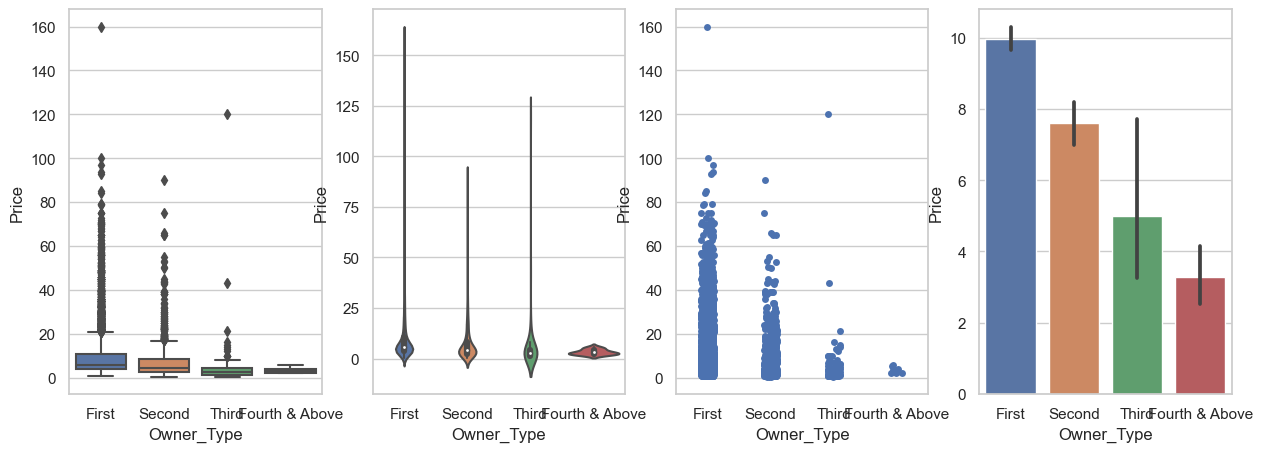

In [49]:
x = 'Owner_Type'
y = 'Price'
order = train_data[x].value_counts().index
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
sns.boxplot(x = train_data[x], y=train_data[y], data=train_data, order=order)
plt.subplot(1,4,2)
sns.violinplot(x = train_data[x], y=train_data[y], data=train_data, order=order)
plt.subplot(1,4,3)
sns.stripplot(x = train_data[x], y=train_data[y], data=train_data, order=order)
plt.subplot(1,4,4)
sns.barplot(x = train_data[x], y=train_data[y], data=train_data, order=order)


<Axes: xlabel='Fuel_Type', ylabel='Mileage_converted'>

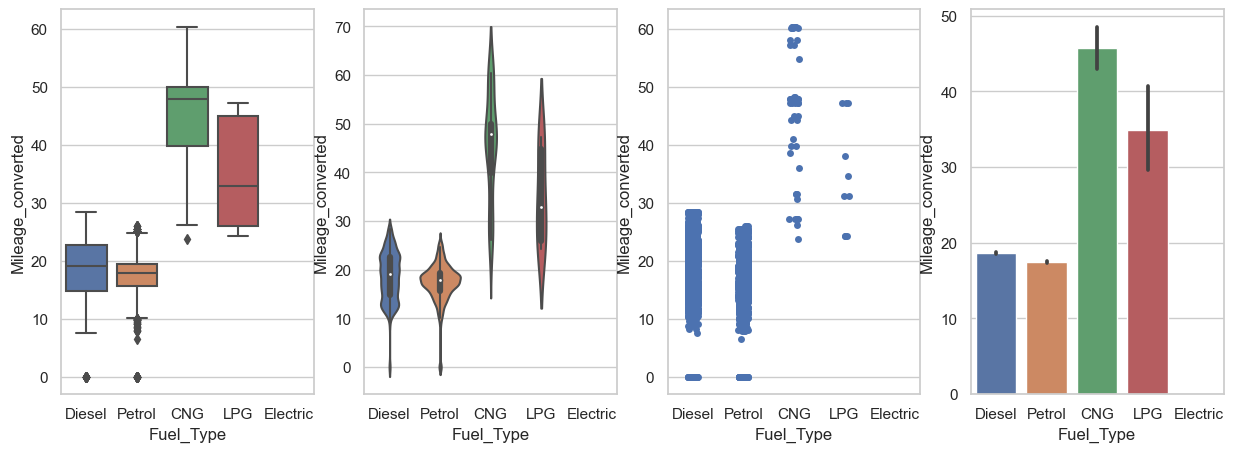

In [50]:
x = 'Fuel_Type'
y = 'Mileage_converted'
order = train_data[x].value_counts().index
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
sns.boxplot(x = train_data[x], y=train_data[y], data=train_data, order=order)
plt.subplot(1,4,2)
sns.violinplot(x = train_data[x], y=train_data[y], data=train_data, order=order)
plt.subplot(1,4,3)
sns.stripplot(x = train_data[x], y=train_data[y], data=train_data, order=order)
plt.subplot(1,4,4)
sns.barplot(x = train_data[x], y=train_data[y], data=train_data, order=order)


# Multivariate Analysis

In [51]:
train_data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Brand', 'Model', 'New_Price_converted',
       'Year_converted', 'Engine_converted', 'Mileage_converted'],
      dtype='object')

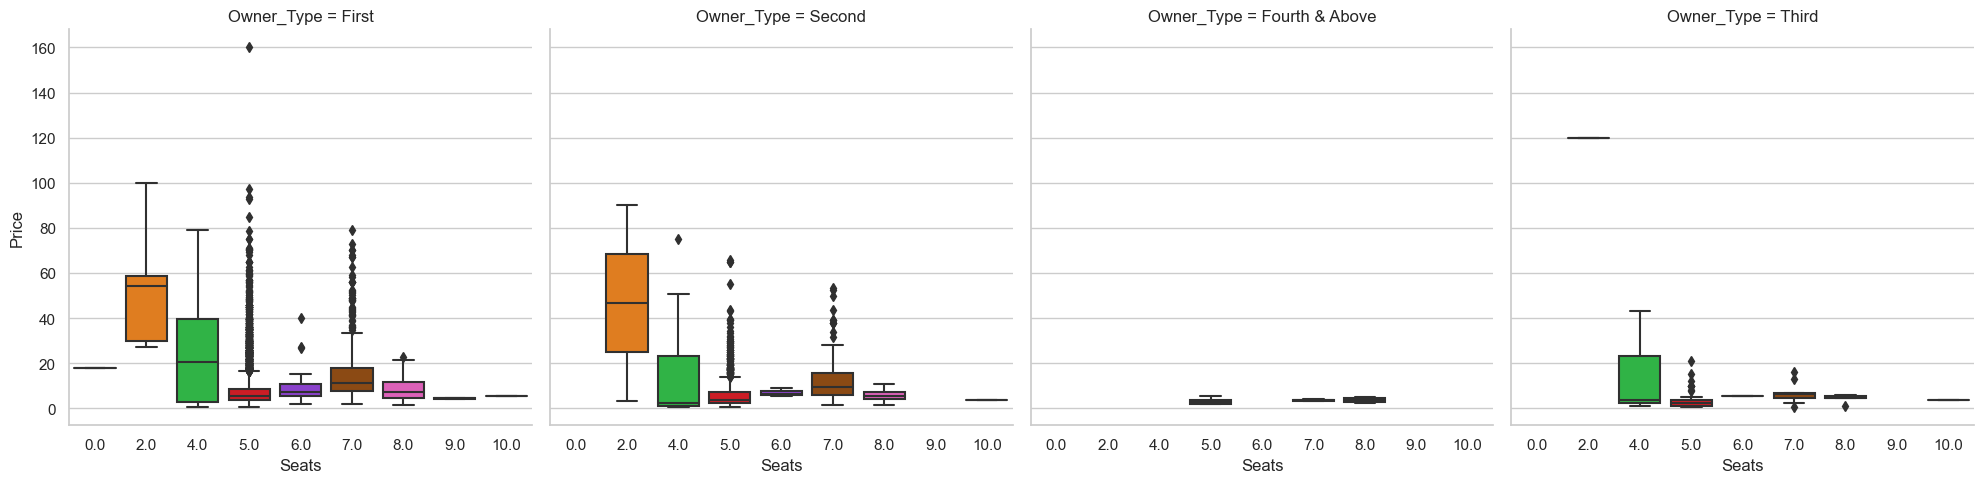

In [52]:
f1 = sns.catplot(x='Seats', y = 'Price', col='Owner_Type', col_wrap=4, data=train_data, kind='box',ci=False,
                   palette='bright', aspect=1)

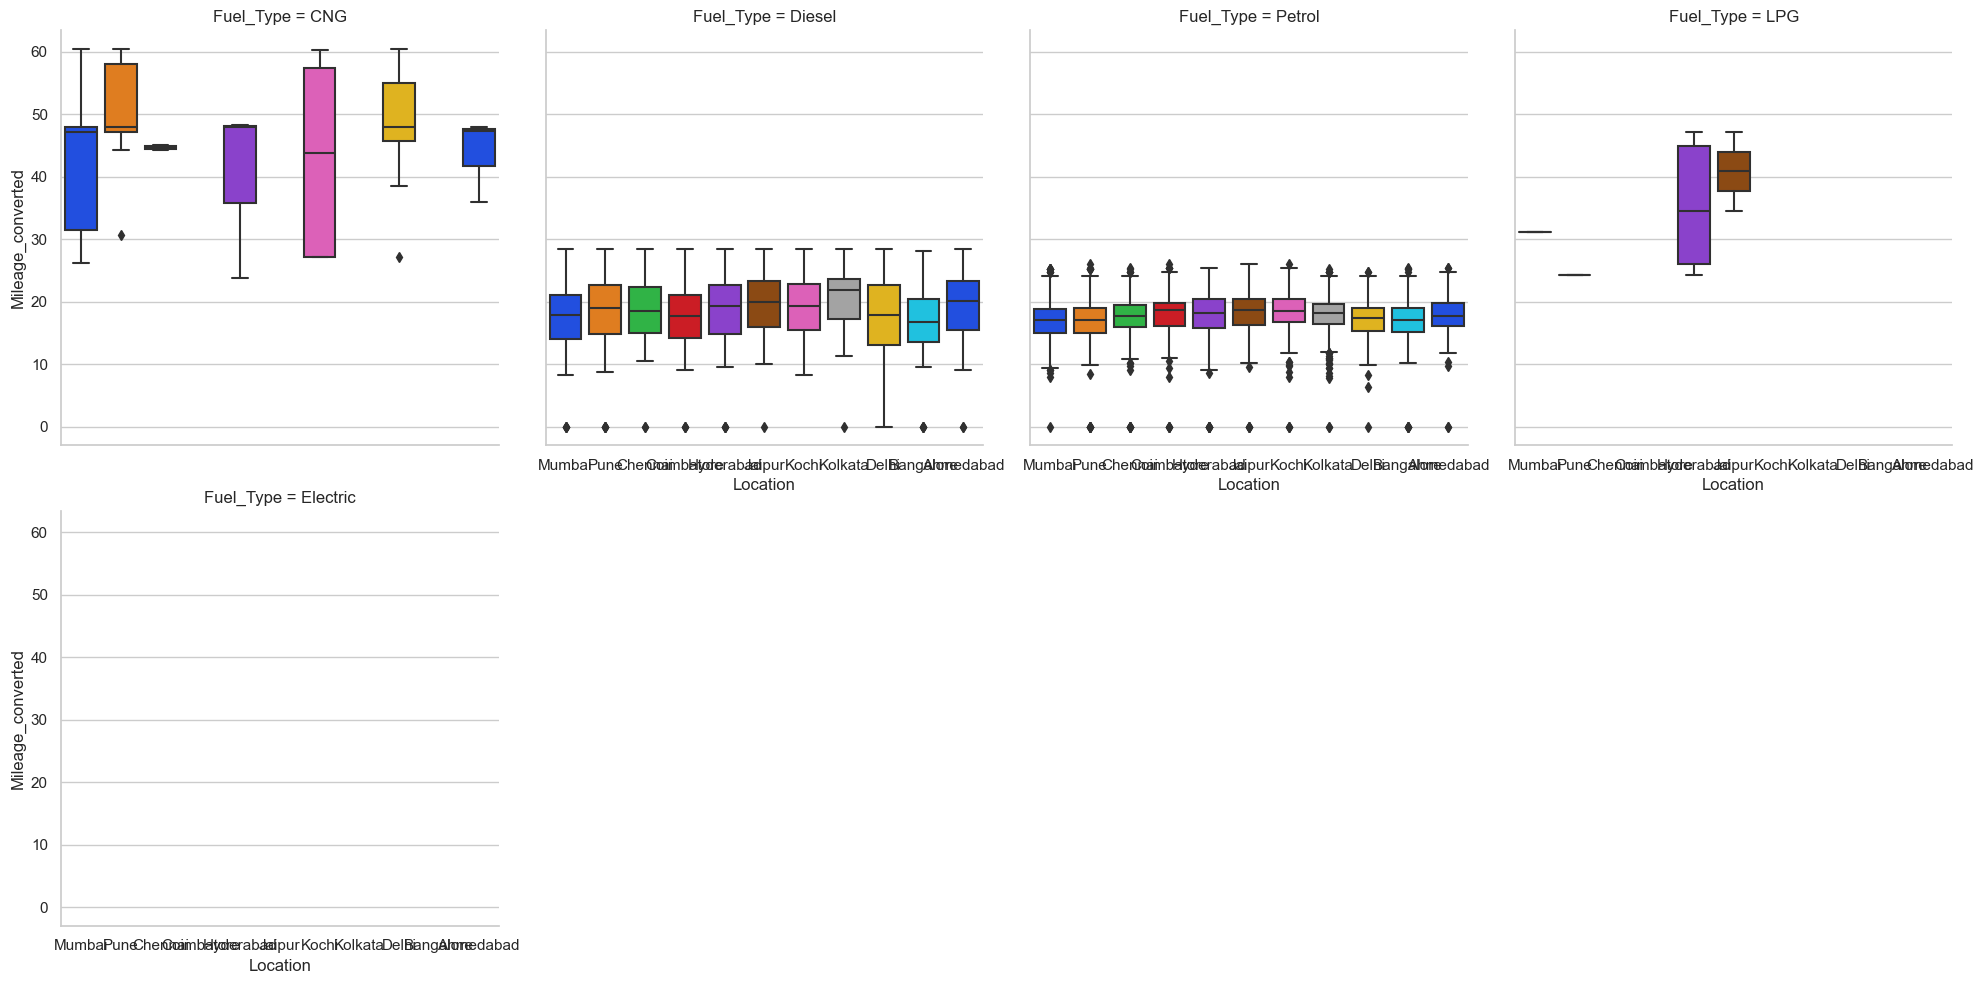

In [81]:
f2 = sns.catplot(x='Location', y = 'Mileage_converted', col='Fuel_Type', col_wrap=4, data=train_data, kind='box',ci=False,
                   palette='bright', aspect=1)

In [82]:
train_data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Brand', 'Model', 'New_Price_converted',
       'Year_converted', 'Engine_converted', 'Mileage_converted'],
      dtype='object')

In [85]:
#Pivot table

pd.crosstab(train_data.Transmission,train_data.Fuel_Type,margins= True, values=train_data.Price, aggfunc='mean')

Fuel_Type,CNG,Diesel,Electric,LPG,Petrol,All
Transmission,,,,,,
Automatic,NaN,24.583078,12.875,NaN,11.258738,19.843971
Manual,3.516786,6.636190,NaN,2.487,4.113947,5.332703
All,3.516786,12.840605,12.875,2.487,5.701100,9.479468


# Data Preprocessing

In [160]:
new_data = train_data.copy()

In [161]:
new_data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Brand', 'Model', 'New_Price_converted',
       'Year_converted', 'Engine_converted', 'Mileage_converted'],
      dtype='object')

In [162]:
print(train_data.shape)

new_data.drop(['Name','Year','Engine','Mileage','New_Price'],axis=1,inplace=True)

print(new_data.shape)

(6019, 19)
(6019, 14)


In [163]:
new_data.duplicated().sum()

1

In [164]:
new_data = new_data.drop_duplicates(ignore_index=True)
new_data.duplicated().sum()

0

In [165]:
new_data.isnull().sum()

Location                  0
Kilometers_Driven         0
Fuel_Type                 0
Transmission              0
Owner_Type                0
Power                   143
Seats                    42
Price                     0
Brand                     0
Model                     0
New_Price_converted    5194
Year_converted            0
Engine_converted         36
Mileage_converted         2
dtype: int64

In [166]:
round((new_data.isnull().sum()/new_data.shape[0])*100,2)

Location                0.00
Kilometers_Driven       0.00
Fuel_Type               0.00
Transmission            0.00
Owner_Type              0.00
Power                   2.38
Seats                   0.70
Price                   0.00
Brand                   0.00
Model                   0.00
New_Price_converted    86.31
Year_converted          0.00
Engine_converted        0.60
Mileage_converted       0.03
dtype: float64

In [167]:
new_data['Seats'].value_counts()

Seats
5.0     5013
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: count, dtype: int64

In [168]:
new_data[(new_data['Seats']==0.0) | (new_data['Mileage_converted']==0.0)].shape

(69, 14)

In [169]:
new_data.drop(['New_Price_converted'],axis=1,inplace=True)
new_data.shape

(6018, 13)

In [170]:
new_data.isnull().sum()

Location               0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Power                143
Seats                 42
Price                  0
Brand                  0
Model                  0
Year_converted         0
Engine_converted      36
Mileage_converted      2
dtype: int64

<Axes: ylabel='Power'>

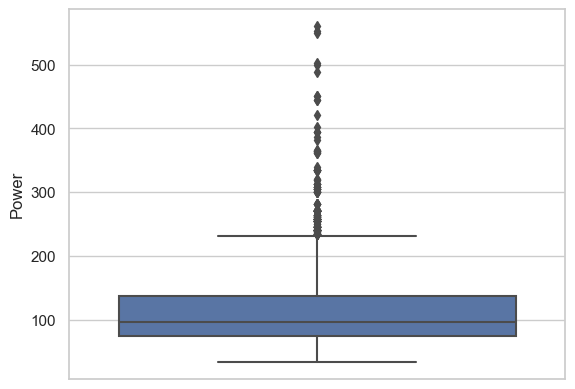

In [171]:
sns.boxplot(y='Power', data=new_data)

In [172]:
new_data['Power'] = new_data['Power'].fillna(new_data['Power'].median())

<Axes: ylabel='Engine_converted'>

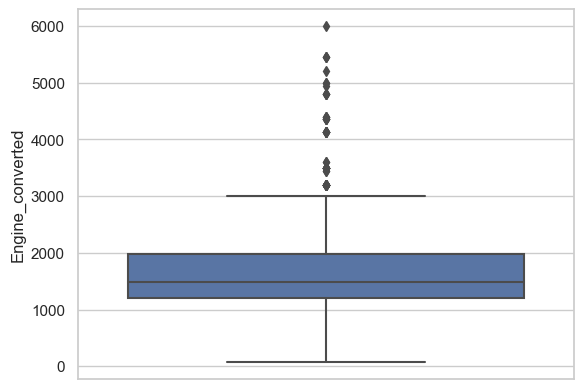

In [173]:
sns.boxplot(y='Engine_converted', data=new_data)

In [174]:
new_data['Engine_converted'] = new_data['Engine_converted'] .fillna(new_data['Engine_converted'] .median())

<Axes: ylabel='Mileage_converted'>

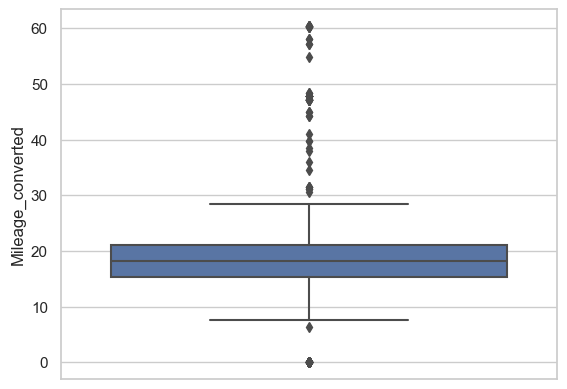

In [175]:
sns.boxplot(y='Mileage_converted', data=new_data)

In [176]:
new_data['Mileage_converted'] = new_data['Mileage_converted'].fillna(new_data['Mileage_converted'].median())

In [177]:
new_data['Seats'].mode()

0    5.0
Name: Seats, dtype: category
Categories (9, float64): [0.0, 2.0, 4.0, 5.0, ..., 7.0, 8.0, 9.0, 10.0]

In [178]:
new_data['Seats'] = new_data['Seats'].fillna(5.0)

In [179]:
round((new_data.isnull().sum()/new_data.shape[0])*100,2)

Location             0.0
Kilometers_Driven    0.0
Fuel_Type            0.0
Transmission         0.0
Owner_Type           0.0
Power                0.0
Seats                0.0
Price                0.0
Brand                0.0
Model                0.0
Year_converted       0.0
Engine_converted     0.0
Mileage_converted    0.0
dtype: float64

In [180]:
# Outlier treatment

outlier_check(new_data, 1.5)

Number of outliers in Kilometers_Driven : 202
Number of outliers in Power : 239
Number of outliers in Price : 718
Number of outliers in Engine_converted : 61
Number of outliers in Mileage_converted : 125


In [185]:
def remove_outliers(col):
    sorted(col)
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1 -(1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [186]:
data_outlier = new_data.copy()

In [187]:
data_outlier.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Power,Seats,Price,Brand,Model,Year_converted,Engine_converted,Mileage_converted
0,Mumbai,72000,CNG,Manual,First,58.16,5.0,1.75,Maruti,Wagon,2010,998.0,47.88
1,Pune,41000,Diesel,Manual,First,126.20,5.0,12.50,Hyundai,Creta,2015,1582.0,19.67
2,Chennai,46000,Petrol,Manual,First,88.70,5.0,4.50,Honda,Jazz,2011,1199.0,18.20
3,Chennai,87000,Diesel,Manual,First,88.76,7.0,6.00,Maruti,Ertiga,2012,1248.0,20.77
4,Coimbatore,40670,Diesel,Automatic,Second,140.80,5.0,17.74,Audi,A4,2013,1968.0,15.20


In [188]:
for column in data_outlier.drop(['Price','Seats'],axis=1).columns:
    if data_outlier[column].dtype != 'object':
        lr,ur = remove_outliers(data_outlier[column])
        data_outlier[column] = np.where(data_outlier[column] > ur, ur , data_outlier[column])
        data_outlier[column] = np.where(data_outlier[column] < lr, lr, data_outlier[column])

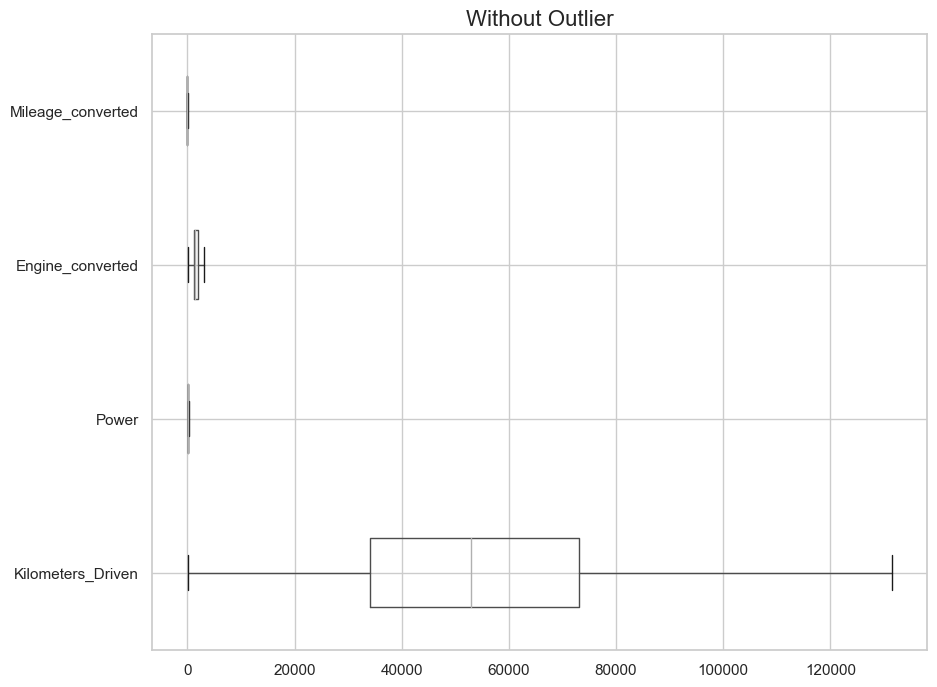

In [189]:
plt.figure(figsize=(10,8))
plt.title("Without Outlier", fontsize=16)
data_outlier.drop(['Price','Seats'], axis=1).boxplot(vert=0)
plt.show()

In [190]:
dataset = data_outlier.copy()

In [191]:
dataset.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Power,Seats,Price,Brand,Model,Year_converted,Engine_converted,Mileage_converted
0,Mumbai,72000.0,CNG,Manual,First,58.16,5.0,1.75,Maruti,Wagon,2010,998.0,29.86
1,Pune,41000.0,Diesel,Manual,First,126.20,5.0,12.50,Hyundai,Creta,2015,1582.0,19.67
2,Chennai,46000.0,Petrol,Manual,First,88.70,5.0,4.50,Honda,Jazz,2011,1199.0,18.20
3,Chennai,87000.0,Diesel,Manual,First,88.76,7.0,6.00,Maruti,Ertiga,2012,1248.0,20.77
4,Coimbatore,40670.0,Diesel,Automatic,Second,140.80,5.0,17.74,Audi,A4,2013,1968.0,15.20


In [194]:
# One hot encoder -- > 2 or more variables and Logistic Regression model

dataset = pd.get_dummies(dataset,columns=['Location','Fuel_Type','Transmission','Owner_Type','Seats','Brand','Model'], drop_first=True)

In [195]:
dataset.head()

,Kilometers_Driven,Power,Price,Year_converted,Engine_converted,Mileage_converted,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Model_Xcent,Model_Xenon,Model_Xylo,Model_Yeti,Model_Z4,Model_Zen,Model_Zest,Model_i10,Model_i20,Model_redi-GO
0,72000.0,58.16,1.75,2010,998.0,29.86,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,41000.0,126.20,12.50,2015,1582.0,19.67,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,46000.0,88.70,4.50,2011,1199.0,18.20,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,87000.0,88.76,6.00,2012,1248.0,20.77,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,40670.0,140.80,17.74,2013,1968.0,15.20,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [208]:
# Feature scaling

scaler = StandardScaler()

# Fit and transform the data
df_standardized = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)


In [209]:
#Split the dataset into dependent and independent variable
x = dataset.drop(['Price'],axis=1)
y = dataset[['Price']]

In [210]:
print(x.shape)
print(y.shape)


(6018, 272)
(6018, 1)


In [211]:
#split the dataset into train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=101)

In [212]:
# Building Linear Regression Model
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

y_predict_train = LR.predict(x_train)
y_predict_test = LR.predict(x_test)

In [213]:
from sklearn.metrics import r2_score

In [214]:
print(r2_score(y_train, y_predict_train))
print(r2_score(y_test, y_predict_test))

0.8584232617977112
0.8181643997256762
